In [5]:
import string
import random
import numpy as np
import matplotlib.pyplot as plt
import math


Plot samples 

In [15]:
# Log normal distribution : 0, 1
from scipy.stats import norm

mu = 0
sigma = 1

def pdf(x):
    return norm.pdf(x, mu, sigma)

def cmf(x):
    return norm.cdf(x, mu, sigma)

X1 = norm.rvs(mu, sigma, 100)
X2 = norm.rvs(mu, sigma, 100)

X = [X1, X2]
print(X)




[array([ 0.15516242,  0.39884126, -1.02129596, -3.41895524,  1.1761452 ,
        0.00697296, -2.24817259, -0.57964371, -0.72993293,  1.39876151,
        0.43360396, -0.43700371, -0.33115198,  1.38774435,  2.1610375 ,
        1.77404105, -1.41140267, -0.79253844,  0.09864338,  0.31783242,
       -1.25564119,  0.17408907, -0.15883743, -1.42726464, -0.7845283 ,
       -0.1256144 , -0.48590443, -1.18189756,  1.62343197, -2.87178803,
       -2.59257328, -0.76341996,  0.75896137, -1.55654176, -0.18626199,
        1.0218356 , -1.21190665,  0.84706757,  1.78192348, -0.29394218,
        0.68818044, -0.68984855, -0.12103218, -0.53818207,  0.40049806,
       -0.20098206,  2.64649517, -0.47091369, -0.30469506, -0.08056961,
       -0.07310855, -0.51418631,  0.60450731,  0.40620323, -1.11203298,
        1.62708314,  1.88980693, -0.72614113,  1.01715037, -0.59873154,
        0.30028368, -1.02490667, -0.40932715,  0.95135719,  1.00847933,
        0.11010909, -0.2585801 , -0.17411658,  0.44097512,  0.9

Use KDE to plot the sample (find the distribution)

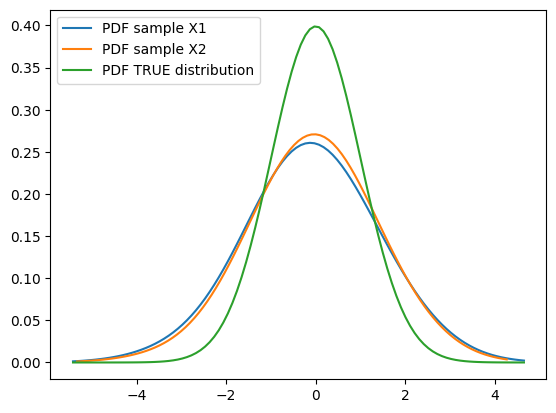

In [17]:
from scipy.stats import gaussian_kde
from numpy import linspace

 
#Plot the PDF for the sample (N)
kde1 = gaussian_kde(X1, bw_method=1.0)
kde2 = gaussian_kde(X2, bw_method=1.0)

#print(kde(0))
dist_space1 = linspace( min(X1) - 2, max(X1) + 2, 100 )
plt.plot( dist_space1, kde1.pdf(dist_space1), label="PDF sample X1" )

dist_space2 = linspace( min(X2) - 2, max(X2) + 2, 100 )
plt.plot( dist_space2, kde2.pdf(dist_space2), label="PDF sample X2" )

plt.plot( dist_space1, pdf(dist_space1), label="PDF TRUE distribution" )

plt.legend()

Median 

In [45]:
#multivariate
from scipy.stats import multivariate_normal
from scipy.stats import Covariance

d = [1, 2]
#A = np.diag(d)
cov = Covariance.from_diagonal(d)

print(cov.covariance)

x = [4, -2]
mean = [0, 0]

dist = multivariate_normal(mean=mean, cov=cov)

print(dist.pdf(x))

#x = np.linspace(-5, 5, 100, endpoint=False)
#y = multivariate_normal.pdf(x, mean=[0, 0], cov=cov)

#fig1 = plt.figure()
#ax = fig1.add_subplot(111)
#ax.plot(x, y)
#plt.show()

[[1 0]
 [0 2]]
1.388848252412369e-05


In [74]:
sigma1 = math.sqrt(2.0)
sigma2 = math.sqrt(0.5)
sigma12 = 0.3

cov = [[sigma1**2, sigma12], [sigma12, sigma2**2]]

x = [4, -2]
mean = [0, 0]

dist = multivariate_normal(mean=mean, cov=cov)

print(dist.pdf(x))

print(dist.pdf([0, 0]))



1.815239477826595e-06
0.16683971353257368


In [87]:
# Draw random

n = 1000000
sample = multivariate_normal.rvs(mean=mean, cov=cov, size=n, random_state=None)

#print(sample)

In [88]:
# Try to calculate the covariance from a sample
x1 = sample[:, 0]
x2 = sample[:, 1]
#print(x1) 
#print(x2)

#mean of x
mean_x1 = 1/n * np.sum(x1)
print(mean_x1)

mean_x2 = 1/n * np.sum(x2)
print(mean_x2)

# variance of x
variance_1 = 1 / n * np.sum((x1 - mean[0])**2)
print(variance_1)


variance_2 = 1 / n * np.sum((x2 - mean[0])**2)
print(variance_2)


# vectors
mean_sample = 1/n * np.sum(sample, axis=0)
print('mean =', mean_sample)

variance_sample = 1/n * np.sum((sample - mean)**2, axis=0)
print('variance =', variance_sample)


0.0004779531571742676
-0.000448668071070489
2.000222453065719
0.4997286709821004
mean = [ 0.00047795 -0.00044867]
variance = [2.00022245 0.49972867]


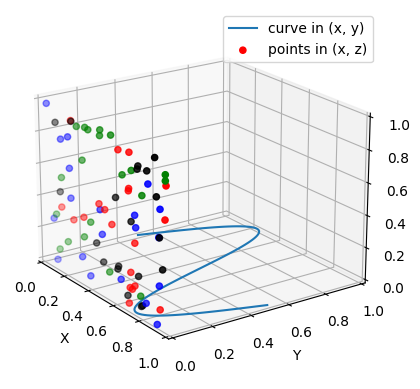

In [89]:
# Plt 3D example

 
ax = plt.figure().add_subplot(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x, y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')

# Fixing random state for reproducibility
np.random.seed(19680801)

x = np.random.sample(20 * len(colors))
y = np.random.sample(20 * len(colors))
c_list = []
for c in colors:
    c_list.extend([c] * 20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x, y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x, z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35, roll=0)

plt.show()

C:\Users\mannl\AppData\Local\Temp\ipykernel_18140\2095536400.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


(100, 100)
(100, 100)


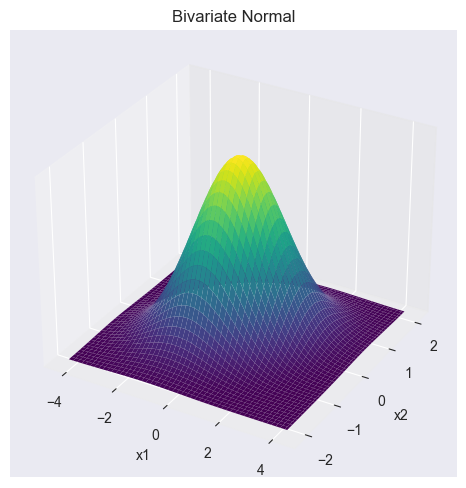

In [100]:
# Plot bivariate

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize']=14,6
fig = plt.figure() 

n=100

x = np.linspace(-3 * sigma1, 3 * sigma1, num=n)
y = np.linspace(-3 * sigma2, 3 * sigma2, num=n)
X, Y = np.meshgrid(x,y)

print (X.shape)
print (Y.shape) 

# Generating the density function
    # for each point in the meshgrid
pdf = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        pdf[i,j] = dist.pdf([X[i,j], Y[i,j]])

key = 131
ax = fig.add_subplot(key, projection = '3d')
ax.plot_surface(X, Y, pdf, cmap = 'viridis')

plt.xlabel("x1")
plt.ylabel("x2")

plt.title(f'Bivariate Normal')
ax.axes.zaxis.set_ticks([])
 
plt.tight_layout()
plt.show()

  